# Subdatasets Meta-Learning Distribution

In [1]:
from os import makedirs
from os.path import join

import pandas as pd

from common import ALIASES, filter_mset, plot_coocc, read_toml

In [2]:
config = read_toml('config.toml')
metachest_dir = config['metachest_dir']
df = pd.read_csv(join(metachest_dir, 'metachest.csv'))

mclasses = {'mtrn': config['mtrn'], 'mval': config['mval'], 'mtst': config['mtst']}
mset_dfs = [filter_mset(mset, mclasses, df) for mset in mclasses.keys()]

distro_dir = join(metachest_dir, 'distro')
makedirs(distro_dir, exist_ok=True)

/data/datasets/metachest/distro/ds_chestxray14.csv
/data/datasets/metachest/distro/ds_chexpert.csv
/data/datasets/metachest/distro/ds_mimic.csv
/data/datasets/metachest/distro/ds_padchest.csv


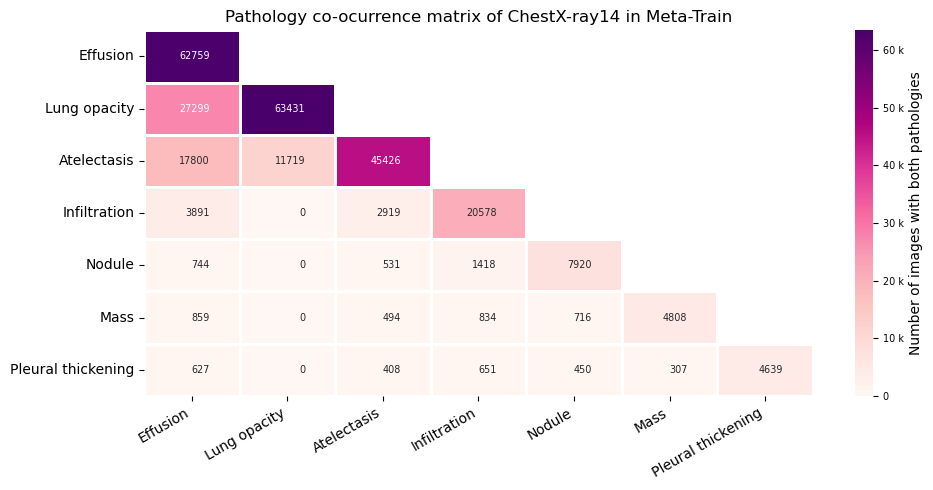

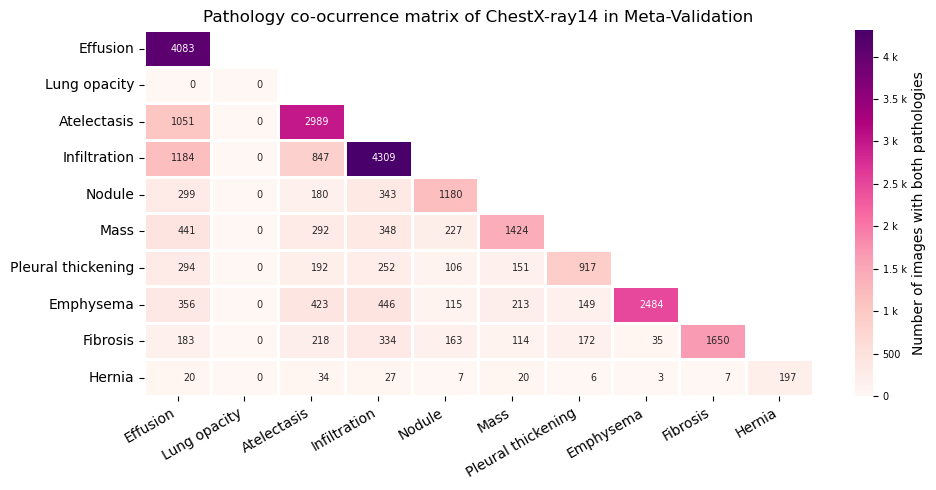

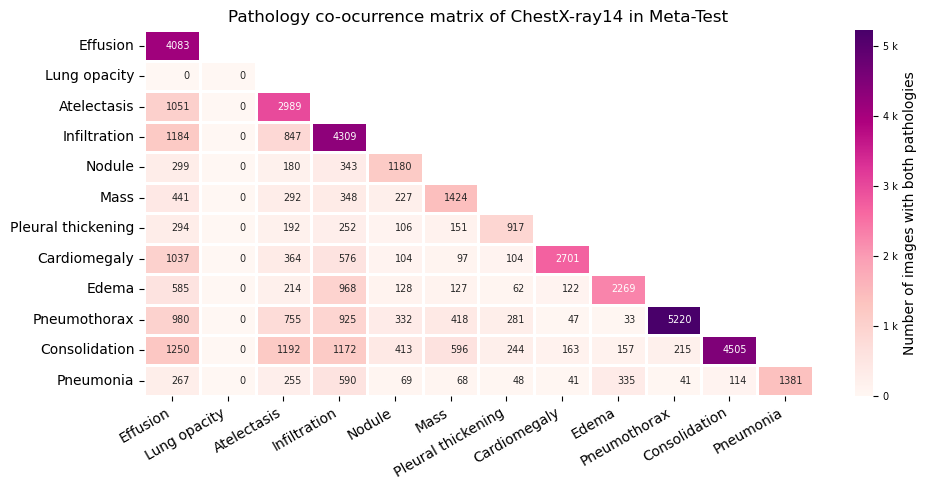

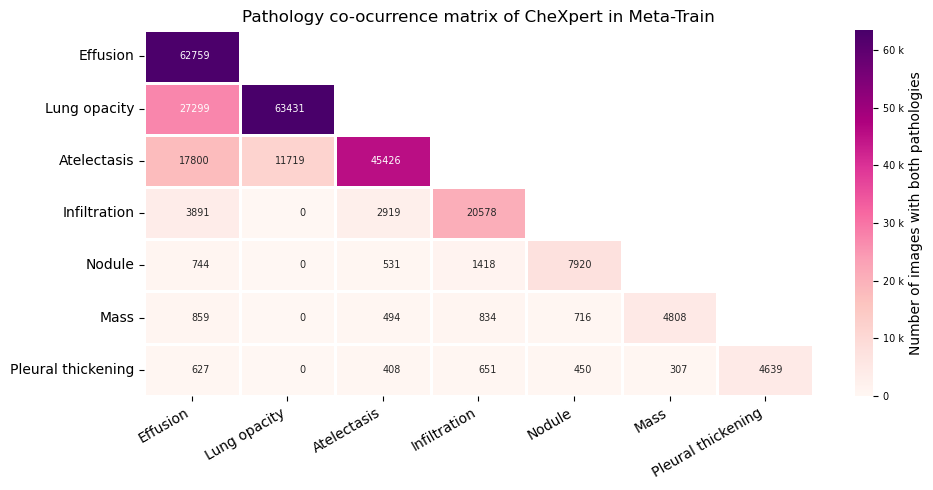

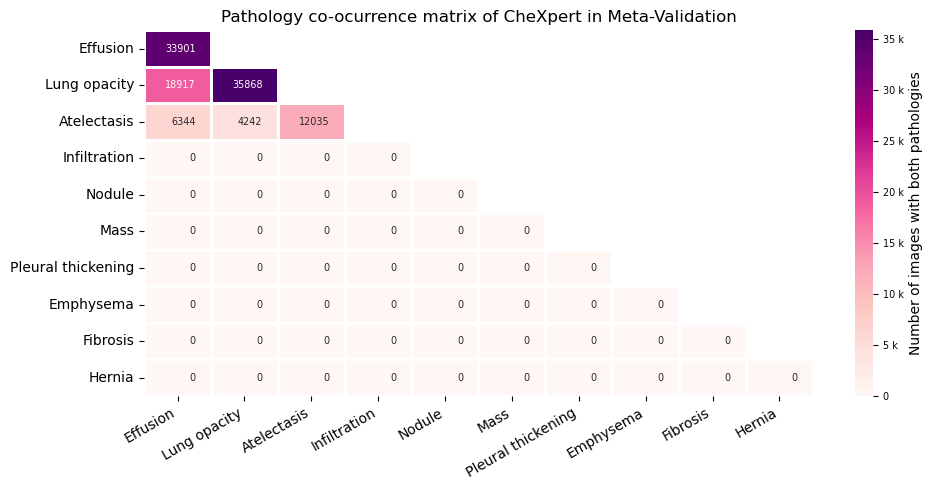

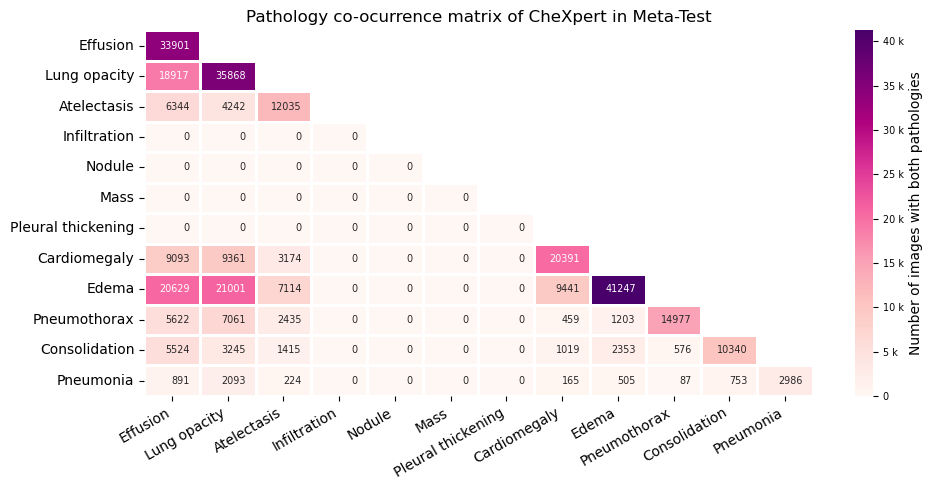

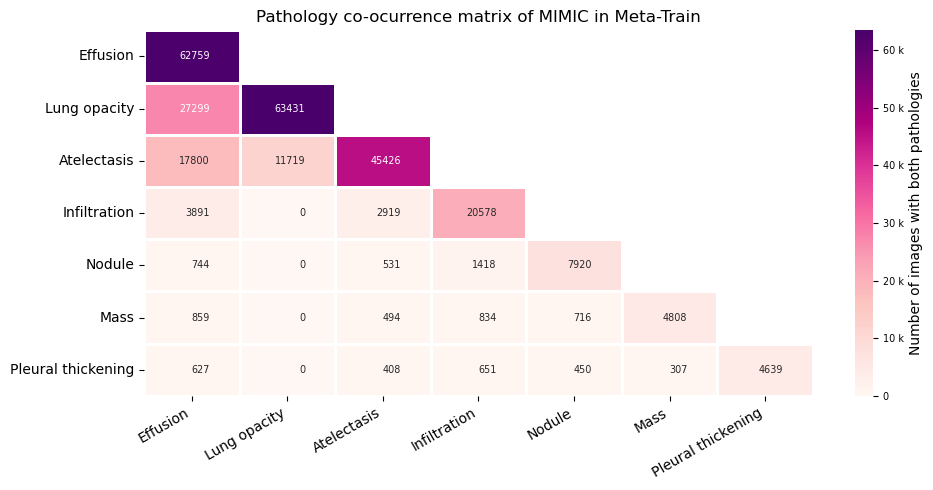

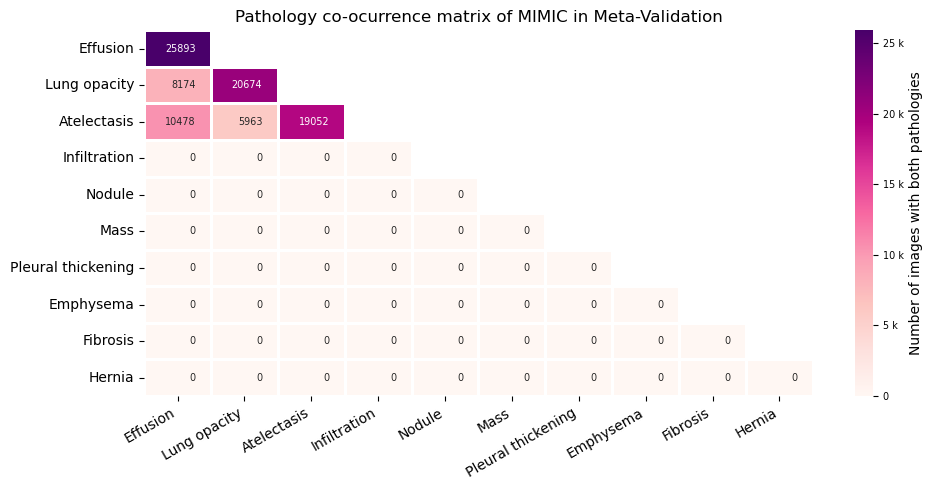

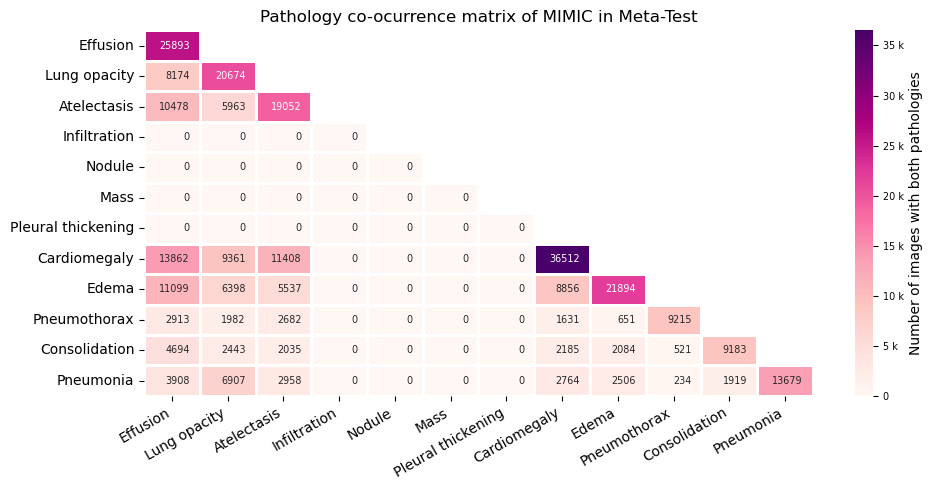

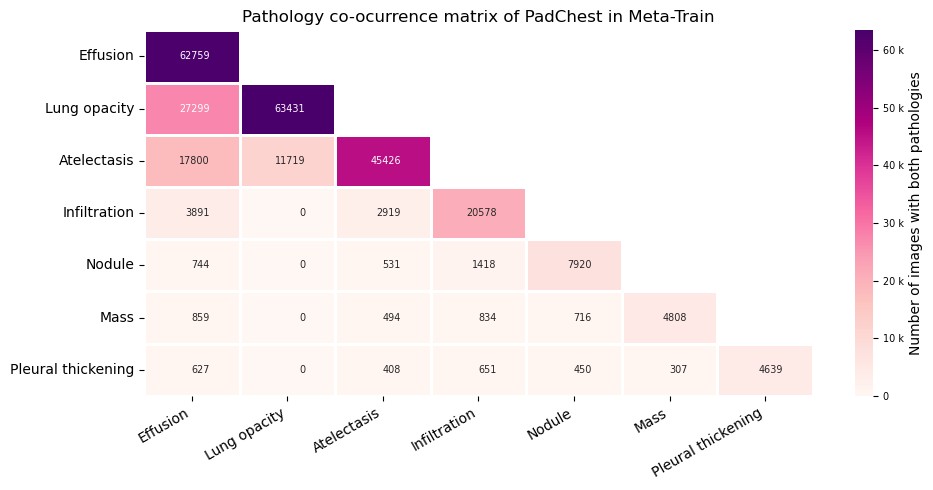

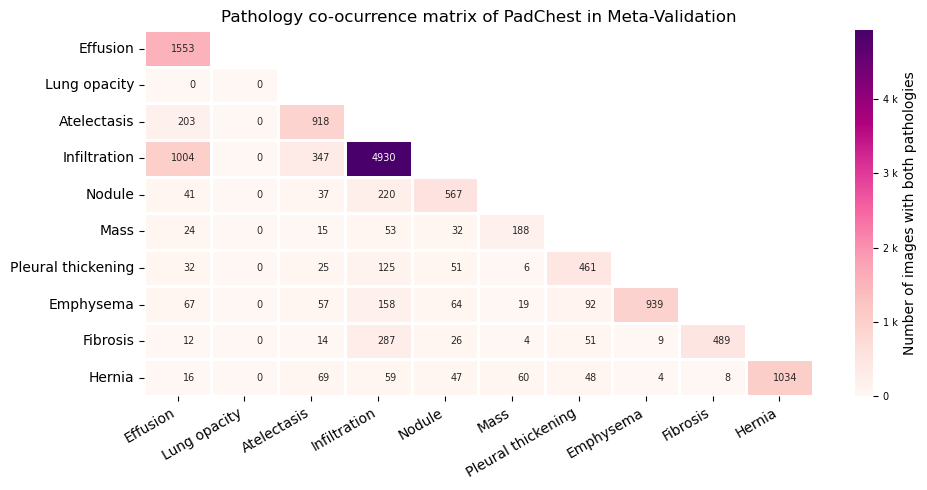

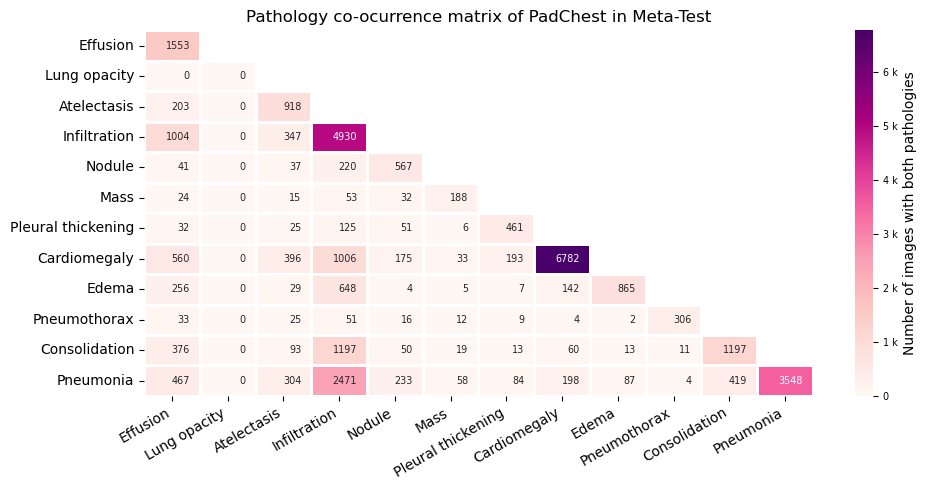

In [3]:
datasets = df['dataset'].unique().tolist()
for dataset in datasets:
    mask = df['dataset'] == dataset
    distro_df = pd.DataFrame({
        'mtrn': [1] * mask.shape[0],
        'mval': mask,
        'mtst': mask,
    }).astype(int)
    path = join(distro_dir, f'ds_{dataset}.csv')
    distro_df.to_csv(path, index=False)
    print(path)
    dataset_title = ALIASES[dataset]
    for mset, mset_df in zip(mclasses.keys(), mset_dfs):
        mask = distro_df[mset].astype(bool)
        ds_mset_df = mset_df.loc[mask]
        plot_coocc(dataset_title, mset, ds_mset_df.iloc[:, 5:])

### No-finding

In [4]:
nf_df = pd.read_csv(join(metachest_dir, 'metachest_nf.csv'))

for dataset in datasets:
    nf_distro = ( (nf_df.mset == 0) |
                 ((nf_df.mset == 1) & (nf_df.dataset == dataset)) |
                 ((nf_df.mset == 2) & (nf_df.dataset == dataset)))
    nf_distro = nf_distro.rename('mask').to_frame().astype(int)
    path = join(distro_dir, f'ds_{dataset}_nf.csv')
    nf_distro.to_csv(path, index=False)
    print(path)

/data/datasets/metachest/distro/ds_chestxray14_nf.csv
/data/datasets/metachest/distro/ds_chexpert_nf.csv
/data/datasets/metachest/distro/ds_mimic_nf.csv
/data/datasets/metachest/distro/ds_padchest_nf.csv
